In [78]:
# Import built-in and third-party libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.io as pio
import sdv
import seaborn as sns
import sys
import warnings
import multivariate as umvar

In [79]:
# Import user-defined modules
def find_dir(dir, root=os.path.abspath('/')):
    """
    Returns path of the input directory, moving backwards along 
    the cwd path. Searches until the root directory is reached.
    
    Returns None if the file system root is reached.
    """
    cd=os.getcwd() 
    while True:
        listdir=os.listdir(cd)
        if dir in listdir:
            return cd
        elif (os.path.basename(cd)==root) or (cd==os.path.abspath('/')):
            return None
        cd=os.path.dirname(cd)

# Add utils path to sys.path
utils_path=find_dir('utils')
if utils_path not in sys.path:
    sys.path.append(utils_path)

# Load user-defined utilities
import utilslab as u
import plottingok as uplot

In [80]:
# Warnings
# warnings.simplefilter('ignore')
warnings.simplefilter('default')

# Set Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option ('display.max_rows', 40)
pd.set_option('display.float_format', '{:f}'.format)

# Set aspects of the visual theme for all matplotlib and seaborn plots
sns.set_theme()

In [81]:
# Load radiomics dataset
dataset_dirpath = './'
dataset_filename = 'radiogenomics.csv'
dataset_filepath = os.path.join(dataset_dirpath, dataset_filename)

df = pd.read_csv(  
    filepath_or_buffer=dataset_filepath, 
    sep=',', 
    on_bad_lines='warn', 
    index_col=False, 
    header=0, 
)

In [82]:
# Drop unnecessary columns
columns = ['id', 'Histology', 'Recurrence']
df.drop(columns=columns, inplace=True)

In [83]:
# Save features in dataframe X, and target in series y
target = 'Hist_binary'

X = df.drop(columns=target).copy()
y = df[target].copy()

cond = df[target] == 0

In [48]:
# Drop too highly correlated features
high_corr_thrsh = .95

corr = X.corr().abs()
upper_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
columns = [column for column in upper_corr.columns if any(upper_corr[column] > high_corr_thrsh)]

X.drop(columns=columns, inplace=True)

In [49]:
target='Hist_binary'

target_corr_df=df.corr()[[target]].iloc[:-1].sort_values(by=target, ascending=False)
target_corr_df

,Hist_binary
original_gldm_SmallDependenceHighGrayLevelEmphasis,0.306653
original_gldm_SmallDependenceEmphasis,0.302281
original_gldm_LowGrayLevelEmphasis,0.297383
original_glszm_HighGrayLevelZoneEmphasis,0.295807
original_glcm_ClusterShade,0.293627
...,...
original_glszm_LowGrayLevelZoneEmphasis,-0.295807
original_gldm_HighGrayLevelEmphasis,-0.297383
original_glcm_SumAverage,-0.299660
original_glcm_JointAverage,-0.299660


In [50]:
low_corr_thrsh=0.01

target_corr_df.loc[np.abs(target_corr_df['Hist_binary'])<low_corr_thrsh]

,Hist_binary
original_gldm_DependenceNonUniformity,0.007255
original_shape_SurfaceVolumeRatio,-0.005967
original_shape_Elongation,-0.006601
original_glcm_Correlation,-0.007503
original_glcm_MCC,-0.007740


In [51]:
lista_low = ['original_gldm_DependenceNonUniformity', 'original_shape_SurfaceVolumeRatio', 'original_shape_Elongation', 'original_glcm_Correlation']
X.drop(columns=lista_low, inplace=True)
X

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterSlice,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Skewness,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Imc1,original_glcm_Imc2,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_ngtdm_Busyness
0,0.481237,8.963171,18.625263,20.000000,17.262677,1294.708333,12.943898,0.648684,885.588414,-2.058225,0.508785,1511.575170,0.976329,1.783631,1.872169,0.513958,-0.308155,0.473524,-2.060159,-0.768836,0.678778,-0.025348,0.677123,0.321736,-0.102377,0.409092,5.295078,0.050038,30.946873,251.659108,603.638700,163.664210,0.010472,0.004976,0.561731,3.025883,7.408606,18.761785,4.570311,2.967303,0.308620,0.238556,2.600000,0.520000,2.800000,179594.200000,542767.600000,88800.850000,0.280000,0.450001,1.200002,0.262501,2.321928,0.003779,132.498906
1,0.656833,12.548555,19.104627,19.849433,20.518285,2206.875000,13.996240,0.704976,1162.773148,-2.268186,0.387717,3269.172636,0.986424,1.782858,2.092151,0.400795,-0.622675,-0.305450,-2.930270,-0.653192,0.694786,0.271356,0.615475,0.296871,-0.102160,0.394095,5.081770,0.047129,44.406488,307.618621,489.820949,262.068039,0.009624,0.004301,0.534186,2.890715,11.124795,18.995670,9.157077,3.059661,0.301836,0.237144,6.250000,0.781250,3.625000,315379.500000,656680.500000,230054.250000,0.250000,0.451389,1.805556,0.112847,2.155639,0.003581,559.922433
2,0.657195,11.036269,16.792985,15.264338,20.248457,1436.000000,12.094665,0.741714,829.883652,-2.321611,0.436055,3197.995434,0.751157,1.899435,1.621511,0.470867,-1.102179,-1.255896,-2.324966,0.281601,0.527083,0.324180,0.326005,0.182866,-0.084167,0.282672,4.472588,0.073078,60.782751,395.031615,429.610997,386.386770,0.012650,0.005038,0.501073,2.495675,17.421118,21.052801,16.513197,3.076713,0.269657,0.213045,7.222222,0.802469,3.666667,154214.111100,182135.111100,147233.861100,0.259259,0.485063,1.940252,0.121266,2.281036,0.006186,202.513315
3,0.387075,8.513651,21.994859,19.849433,18.867962,1343.500000,13.736166,0.564827,1042.462757,-1.948213,0.524183,2189.719719,0.875061,2.044097,1.447629,0.546346,-0.820627,-0.996245,-1.951678,0.216973,0.720432,0.412172,0.475419,0.209598,-0.130453,0.412451,5.060750,0.043147,54.044600,326.402768,410.911872,305.275492,0.015271,0.006158,0.501596,2.547220,11.324419,15.760823,10.215318,3.041275,0.286102,0.243671,7.222222,0.802469,3.666667,120433.222200,169391.555

In [52]:
pd.set_option('display.max_rows', None)
X_norm = u.normalize(X)
X.corr()

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterSlice,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Skewness,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Imc1,original_glcm_Imc2,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_ngtdm_Busyness
original_shape_Flatness,1.000000,0.255202,-0.215057,-0.052759,-0.078464,0.162651,0.063303,0.476958,0.054039,-0.124230,-0.198726,0.206270,-0.026409,0.112809,-0.004119,-0.083362,-0.272610,-0.276405,-0.079507,0.102682,-0.017095,0.241813,-0.086939,-0.069522,-0.020866,-0.036395,-0.221424,0.223048,0.029533,0.202666,-0.113236,0.317485,0.032923,-0.049934,-0.120137,-0.161225,0.263143,0.119233,0.286763,0.118982,-0.050402,-0.110766,0.190908,0.195764,0.242897,0.152292,0.092185,0.195521,0.255258,0.101207,0.185831,-0.110960,-0.192393,0.159124,0.025197
original_shape_LeastAxisLength,0.255202,1.000000,0.856392,0.844597,0.848742,0.877194,0.943510,-0.391713,0.893665,-0.264207,-0.157936,0.804696,0.060975,0.232974,-0.117415,0.054794,-0.442748,-0.419208,-0.021800,0.267881,0.259468,0.314209,0.095757,-0.300746,-0.516649,0.362409,-0.353943,0.529578,-0.022383,0.647193,-0.024471,0.636628,-0.061525,-0.069733,-0.339284,-0.393368,0.718615,0.369252,0.752146,0.744325,-0.307436,0.006945,0.762883,0.332344,0.318732,0.658871,0.403751,0.838493,0.053661,0.511851,0.489484,0.217223,0.423587,0.160841,0.437156
original_shape_MajorAxisLength,-0.215057,0.856392,1.000000,0.876401,0.895963,0.755106,0.909781,-0.642085,0.863192,-0.233632,-0.058045,0.643060,0.123772,0.227867,-0.125057,0.099265,-0.314009,-0.264238,0.013204,0.234269,0.277691,0.206680,0.191468,-0.236058,-0.512464,0.409410,-0.201319,0.376040,0.004234,0.527347,0.014957,0.479693,-0.060708,-0.024025,-0.302872,-0.325751,0.530594,0.275202,0.553535,0.671196,-0.269675,0.076104,0.616471,0.203545,0.216900,0.547236,0.340039,0.689374,-0.044948,0.483886,0.419527,0.280048,0.533480,0.098236,0.420266
original_shape_Maximum2DDiameterColumn,-0.052759,0.844597,0.876401,1.000000,0.891209,0.746029,0.901252,-0.591232,0.841797,-0.272652,-0.077463,0.630170,0.136425,0.273668,-0.128931,0.073466,-0.373096,-0.322059,-0.009954,0.261850,0.279130,0.268003,0.173349,-0.198286,-0.448791,0.367909,-0.178371,0.335796,0.087816,0.502253,-0.046715,0.525077,0.018871,0.046160,-0.348671,-0.400689,0.498185,0.228709,0.540791,0.629568,-0.213688,0.131858,0.630329,0.237931,0.26

In [53]:
# Save minimum and maximum values for each feature
min_max_feat = X.describe().loc[['min', 'max']]
X_norm = u.normalize(X)
X_norm.describe()

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterSlice,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Skewness,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Imc1,original_glcm_Imc2,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_ngtdm_Busyness
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.577368,0.210988,0.276111,0.237908,0.279938,0.070953,0.224839,0.545865,0.090946,0.358638,0.726636,0.042252,0.777863,0.467671,0.018912,0.510181,0.593305,0.762244,0.592383,0.877857,0.680010,0.464043,0.636431,0.534516,0.571207,0.641558,0.717006,0.151253,0.380393,0.487893,0.343740,0.329391,0.328979,0.416047,0.191834,0.440439,0.117115,0.087310,0.079300,0.421989,0.501943,0.599758,0.050026,0.367861,0.557587,0.055324,0.037867,0.074438,0.416207,0.566193,0.431040,0.411331,0.507389,0.205002,0.052650
std,0.211953,0.181276,0.209235,0.200880,0.203739,0.149455,0.188486,0.218991,0.134312,0.285850,0.133877,0.116127,0.263489,0.323291,0.088292,0.192429,0.242844,0.268016,0.158383,0.112229,0.200807,0.286004,0.262181,0.231707,0.217966,0.206484,0.234326,0.209419,0.189224,0.226503,0.250834,0.239700,0.205241,0.205540,0.203573,0.202254,0.158071,0.120327,0.141700,0.206784,0.212467,0.200710,0.151371,0.314657,0.301240,0.106180,0.090938,0.143136,0.223755,0.271139,0.283271,0.240865,0.231979,0.165362,0.145357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [54]:
# Import metadata from real data. Metadata gather the info related  
# to each column, including their data types (called "sdtypes")
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(X_norm)
print(metadata)

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "original_shape_Flatness": {
            "sdtype": "numerical"
        },
        "original_shape_LeastAxisLength": {
            "sdtype": "numerical"
        },
        "original_shape_MajorAxisLength": {
            "sdtype": "numerical"
        },
        "original_shape_Maximum2DDiameterColumn": {
            "sdtype": "numerical"
        },
        "original_shape_Maximum2DDiameterSlice": {
            "sdtype": "numerical"
        },
        "original_shape_MeshVolume": {
            "sdtype": "numerical"
        },
        "original_shape_MinorAxisLength": {
            "sdtype": "numerical"
        },
        "original_shape_Sphericity": {
            "sdtype": "numerical"
        },
        "original_shape_SurfaceArea": {
            "sdtype": "numerical"
        },
        "original_firstorder_10Percentile": {
            "sdtype": "numerical"
        },
        "original_firstorder_90Percentile": {
 

In [55]:
metadata_filepath = os.path.abspath('my_metadata.json')

# Save metadata
metadata.save_to_json(filepath=metadata_filepath)

# Load previously saved metadata
metadata = SingleTableMetadata.load_from_json(filepath=metadata_filepath)

In [56]:
# Define the object that learns from real data and replicates them to generate synthetic data
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(
    metadata, 
    enforce_min_max_values=True, 
    enforce_rounding=False, 
    epochs=300, 
    batch_size=500, 
    verbose=True
)

synthesizer.fit(X_norm)

/opt/anaconda3/lib/python3.11/site-packages/sdv/single_table/ctgan.py:24: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

Gen. (-2.56) | Discrim. (-0.45): 100%|██████████| 300/300 [00:22<00:00, 13.20it/s]


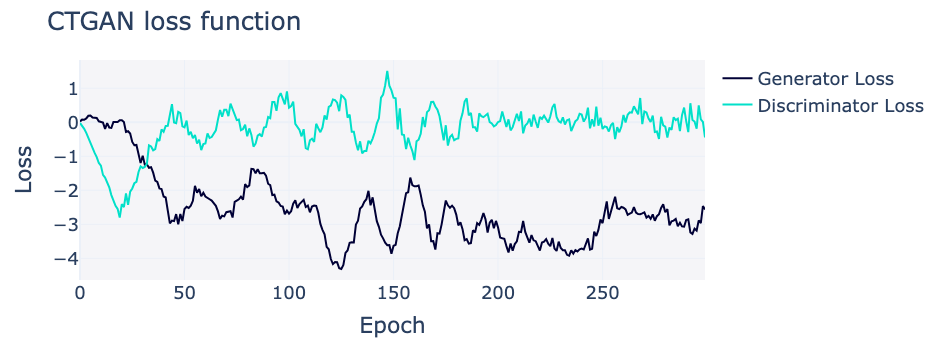

In [57]:
# Plot the trends of loss functions through epochs
fig = synthesizer.get_loss_values_plot()
fig.show()

In [58]:
synthesizer_filepath = os.path.abspath('my_synthesizer.pkl')

# Save and the synthesizer
synthesizer.save(filepath=synthesizer_filepath)

# Load previously saved synthesizer
synthesizer = CTGANSynthesizer.load(filepath=synthesizer_filepath)

In [59]:
# Generate synthetic data
size = int(10e4)

synthesizer.reset_sampling()

X_ctgan = synthesizer.sample(
    num_rows=size, 
    output_file_path=None
)

In [76]:
X_ctgan.corr()

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterSlice,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Skewness,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Imc1,original_glcm_Imc2,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_ngtdm_Busyness
original_shape_Flatness,1.000000,0.007064,0.023578,0.032535,-0.028660,-0.007846,-0.027879,0.067130,0.019668,0.032200,-0.015934,0.023586,-0.014908,0.040114,0.023678,0.014821,-0.071980,-0.046299,-0.047260,0.086150,0.086282,-0.075458,-0.033989,-0.094274,-0.015139,0.046633,-0.001808,0.040185,-0.055726,-0.017330,-0.004021,0.072224,0.030316,0.026750,-0.063954,0.032125,-0.003964,-0.023468,0.039394,0.053697,0.023181,-0.007698,0.008065,0.013417,-0.038503,-0.026419,-0.028802,-0.070198,-0.050492,0.021030,0.020406,-0.008674,-0.137084,-0.045163,0.012493
original_shape_LeastAxisLength,0.007064,1.000000,0.018103,-0.002305,0.049497,-0.043100,-0.051241,-0.002598,-0.009126,0.006678,-0.004286,-0.001735,0.009018,0.030244,0.006528,0.027249,0.025212,-0.028665,0.005668,-0.048791,-0.012245,-0.072455,-0.008377,-0.064294,-0.012820,0.027110,0.017452,-0.020220,-0.009518,-0.054862,-0.003473,0.044491,0.026286,0.006583,-0.019907,0.007892,-0.021672,0.018992,-0.009796,-0.084044,-0.039498,0.032521,0.009128,0.009489,0.021294,-0.033389,0.007553,-0.012077,-0.002252,-0.012911,0.044642,-0.037186,-0.045310,0.000060,-0.012069
original_shape_MajorAxisLength,0.023578,0.018103,1.000000,0.027681,0.053291,-0.000069,0.017084,-0.048019,0.016563,-0.019293,0.027492,-0.002709,0.030174,0.053407,0.008917,0.080621,-0.041784,-0.011209,-0.007356,-0.021157,0.011414,0.051588,0.026008,-0.056478,-0.036258,-0.018615,-0.010664,0.027249,0.046833,-0.044330,-0.076771,-0.009211,0.055960,0.046739,-0.012985,-0.076895,0.051919,0.018384,-0.043406,-0.049763,0.033462,-0.023949,0.012452,0.033737,-0.000602,0.011195,-0.011130,0.003491,-0.037360,-0.024956,-0.071488,0.019201,-0.039359,0.039365,0.001897
original_shape_Maximum2DDiameterColumn,0.032535,-0.002305,0.027681,1.000000,0.009361,-0.000363,-0.085677,-0.021212,0.001836,-0.036811,-0.035640,0.036555,0.040557,-0.024174,0.018461,0.016091,0.050177,0.001247,0.024463,0.023050,-0.009323,0.033081,0.018712,-0.002664,0.058554,-0.048045,0.016844,0.009941,0.089045,-0.033771,0.015756,-0.001336,-0.060724,-0.022266,-0.000381,-0.032862,0.026146,0.039725,-0.041058,-0.005734,-0.002327,0

In [60]:
pd.set_option('display.max_rows', None)
# Compute and compare sample statistics
matrice = umvar.mvsk_compare(X_norm, X_ctgan, side_by_side=True)
matrice

mean            \
                                                   Original Synthetic   
original_shape_Flatness                            0.577368  0.815586   
original_shape_LeastAxisLength                     0.210988  0.385590   
original_shape_MajorAxisLength                     0.276111  0.430688   
original_shape_Maximum2DDiameterColumn             0.237908  0.346333   
original_shape_Maximum2DDiameterSlice              0.279938  0.314754   
original_shape_MeshVolume                          0.070953  0.089967   
original_shape_MinorAxisLength                     0.224839  0.080407   
original_shape_Sphericity                          0.545865  0.671457   
original_shape_SurfaceArea                         0.090946  0.067242   
original_firstorder_10Percentile                   0.358638  0.365082   
original_firstorder_90Percentile                   0.726636  0.740040   
original_firstorder_Energy                         0.042252  0.023870   
original_firstorder_Entropy                        0.777863  0.836358   
original_firstorder_InterquartileRange             0.467671  0.444954   
original_firstorder_Kurtosis                       0.018912  0.011683   
original_firstorder_Maximum                        0.510181  0.654277   
original_firstorder_Mean                           0.593305  0.728685   
original_firstorder_Median                         0.762244  0.879468   
original_firstorder_Minimum                        0.592383  0.791582   
original_firstorder_Skewness                       0.877857  0.900701   
original_glcm_ClusterProminence                    0.680010  0.852979   
original_glcm_ClusterShade                         0.464043  0.526990   
original_glcm_ClusterTendency                      0.636431  0.699678   
original_glcm_Contrast                             0.534516  0.406656   
original_glcm_Imc1                                 0.571207  0.442227   
original_glcm_Imc2                                 0.641558  0.864877   
original_gldm_DependenceEntropy                    0.717006  0.835124   
original_gldm_DependenceNonUniformityNormalized    0.151253  0.061269   
original_gldm_DependenceVariance                   0.380393  0.421178   
original_gldm_LargeDependenceEmphasis              0.487893  0.518047   
original_gldm_LargeDependenceHighGrayLevelEmphasis 0.343740  0.266580   
original_gldm_LargeDependenceLowGrayLevelEmphasis  0.329391  0.168606   
original_gldm_SmallDependenceEmphasis              0.328979  0.450645   
original_gldm_SmallDependenceLowGrayLevelEmphasis  0.416047  0.492126   
original_glrlm_GrayLevelNonUniformityNormalized    0.191834  0.132076   
original_glrlm_HighGrayLevelRunEmphasis            0.440439  0.415976   
original_glrlm_LongRunEmphasis                     0.117115  0.040845   
original_glrlm_LongRunHighGrayLevelEmphasis        0.087310  0.180634   
original_glrlm_LongRunLowGrayLevelEmphasis         0.079300  0.051974   
original_glrlm_RunEntropy                          0.421989  0.182527   
original_glrlm_RunLengthNonUniformityNormalized    0.501943  0.305013   
original_glrlm_ShortRunLowGrayLevelEmphasis        0.599758  0.731062   
original_glszm_GrayLevelNonUniformity              0.050026  0.024703   
original_glszm_GrayLevelNonUniformityNormalized    0.367861  0.581261   
original_glszm_HighGrayLevelZoneEmphasis           0.557587  0.308396   
original_glszm_LargeAreaEmphasis                   0.055324  0.081566   
original_glszm_LargeAreaHighGrayLevelEmphasis      0.037867  0.071541   
original_glszm_LargeAreaLowGrayLevelEmphasis       0.074438  0.185984   
original_glszm_SizeZoneNonUniformityNormalized     0.416207  0.492419   
original_glszm_SmallAreaEmphasis                   0.566193  0.752615   
original_glszm_SmallAreaHighGrayLevelEmphasis      0.431040  0.451887   
original_glszm_SmallAreaLowGrayLevelEmphasis       0.411331  0.192892   
original_glszm_ZoneEntropy                         0.507389  0.361143   
original_glszm_ZonePercentage           

In [61]:
# Media
media_real = []
for i in range (len(matrice)):
    media_real.append(matrice.iat[i, 0])
    
media_syn = []
for i in range (len(matrice)):
    media_syn.append(matrice.iat[i, 1])  
    
err_rel = []
for i in range(len(matrice)):
    err_rel.append((abs(media_real[i]-media_syn[i])) / abs(media_real[i]))

errore_rel_medio = sum(err_rel) / len(err_rel)
print(errore_rel_medio)

# Varianza
var_real = []
for i in range (len(matrice)):
    var_real.append(matrice.iat[i, 2])  

var_syn = []
for i in range (len(matrice)):
    var_syn.append(matrice.iat[i, 3])  

err_rel_2 = []

for i in range(len(matrice)):
    err_rel_2.append((abs(var_real[i]-var_syn[i])) / abs(var_real[i]))

errore_rel_medio_2 = sum(err_rel_2) / len(err_rel_2)
print(errore_rel_medio_2)

# Asimmetria
sk_real = []
for i in range (len(matrice)):
    sk_real.append(matrice.iat[i, 4])  

sk_syn = []
for i in range (len(matrice)):
    sk_syn.append(matrice.iat[i, 5])  

err_rel_3 = []

for i in range(len(matrice)):
    err_rel_3.append((abs(sk_real[i]-sk_syn[i])) / abs(sk_real[i]))

errore_rel_medio_3 = sum(err_rel_3) / len(err_rel_3)
print(errore_rel_medio_3)

# Curtosi
kur_real = []
for i in range (len(matrice)):
    kur_real.append(matrice.iat[i, 6])  

kur_syn = []
for i in range (len(matrice)):
    kur_syn.append(matrice.iat[i, 7])  

err_rel_4 = []

for i in range(len(matrice)):
    err_rel_4.append((abs(kur_real[i]-kur_syn[i]))/abs(kur_real[i]))

errore_rel_medio_4 = sum(err_rel_4) / len(err_rel_4)
print(errore_rel_medio_4)

0.35753937942645025
0.4472407461167744
4.683593695738158
105.63503223413832


In [62]:
for name in matrice.axes[0].tolist():
    print(name) 

original_shape_Flatness
original_shape_LeastAxisLength
original_shape_MajorAxisLength
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterSlice
original_shape_MeshVolume
original_shape_MinorAxisLength
original_shape_Sphericity
original_shape_SurfaceArea
original_firstorder_10Percentile
original_firstorder_90Percentile
original_firstorder_Energy
original_firstorder_Entropy
original_firstorder_InterquartileRange
original_firstorder_Kurtosis
original_firstorder_Maximum
original_firstorder_Mean
original_firstorder_Median
original_firstorder_Minimum
original_firstorder_Skewness
original_glcm_ClusterProminence
original_glcm_ClusterShade
original_glcm_ClusterTendency
original_glcm_Contrast
original_glcm_Imc1
original_glcm_Imc2
original_gldm_DependenceEntropy
original_gldm_DependenceNonUniformityNormalized
original_gldm_DependenceVariance
original_gldm_LargeDependenceEmphasis
original_gldm_LargeDependenceHighGrayLevelEmphasis
original_gldm_LargeDependenceLowGrayLevelEmphasis

In [63]:
media_real = []

for i in range (len(matrice)):
    media_real.append(matrice.iat[i, 7]) 

media_real

[0.9063942386275166,
 0.8668470034849123,
 -0.8412739172304278,
 -0.06922046656004532,
 0.1511653667027555,
 11.872347833177958,
 9.101236523313744,
 -0.41587335035343553,
 17.59739622263565,
 -0.5224777950871013,
 0.4046962247530126,
 35.05487530870089,
 3.6181590792195806,
 -1.2839165508729897,
 121.89508477125433,
 -0.6713599762294926,
 -0.09011289877589945,
 4.401452966533818,
 -0.034229439957641716,
 6.672583125636525,
 5.481581644400215,
 -1.039274656556539,
 0.14388542528685955,
 -0.9909247542560449,
 -0.5240974380788406,
 2.954588819933605,
 4.539216185684696,
 14.957907228281115,
 -0.13791515255914932,
 -0.984337621772867,
 0.10601566847367083,
 2.43533209689282,
 -0.01887302519996714,
 -0.8679221793824508,
 6.0005336124417,
 -0.5916683582112574,
 41.57829251208759,
 5.974897666443518,
 40.25407415641219,
 1.189941132437765,
 -0.5168880653680343,
 0.03630823184687815,
 46.03226703325041,
 -1.6415302238100409,
 -1.2222073301835896,
 31.588930332840775,
 20.37325645087405,
 2.37

In [64]:
# Run a diagnostic to ensure that the data is valid (e.g, unique id, continuous values must adhere to the min/max of the real data, etc.)
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=X_norm, 
    synthetic_data=X_ctgan, 
    metadata=metadata, 
    verbose=True
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 55/55 [00:00<00:00, 3007.26it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 1319.79it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [65]:
# Get Data Validity details
diagnostic.get_details('Data Validity')

,Column,Metric,Score
0,original_shape_Flatness,BoundaryAdherence,1.000000
1,original_shape_LeastAxisLength,BoundaryAdherence,1.000000
2,original_shape_MajorAxisLength,BoundaryAdherence,1.000000
3,original_shape_Maximum2DDiameterColumn,BoundaryAdherence,1.000000
4,original_shape_Maximum2DDiameterSlice,BoundaryAdherence,1.000000
5,original_shape_MeshVolume,BoundaryAdherence,1.000000
6,original_shape_MinorAxisLength,BoundaryAdherence,1.000000
7,original_shape_Sphericity,BoundaryAdherence,1.000000
8,original_shape_SurfaceArea,BoundaryAdherence,1.000000
9,original_firstorder_10Percentile,BoundaryAdherence,1.000000


In [66]:
# Get Data Structure details
diagnostic.get_details('Data Structure')

,Metric,Score
0,TableStructure,1.000000


In [67]:
# Data quality
# Run a quality report to receive a score and a corresponding report
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=X_norm, 
    synthetic_data=X_ctgan, 
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 55/55 [00:01<00:00, 46.17it/s]|
Column Shapes Score: 66.74%

(2/2) Evaluating Column Pair Trends: |██████████| 1485/1485 [00:09<00:00, 150.75it/s]|
Column Pair Trends Score: 84.05%

Overall Score (Average): 75.4%



In [68]:
# Get details on Column Shapes
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,original_shape_Flatness,KSComplement,0.499421
1,original_shape_LeastAxisLength,KSComplement,0.548813
2,original_shape_MajorAxisLength,KSComplement,0.737108
3,original_shape_Maximum2DDiameterColumn,KSComplement,0.739333
4,original_shape_Maximum2DDiameterSlice,KSComplement,0.907331
5,original_shape_MeshVolume,KSComplement,0.797936
6,original_shape_MinorAxisLength,KSComplement,0.487898
7,original_shape_Sphericity,KSComplement,0.738072
8,original_shape_SurfaceArea,KSComplement,0.606214
9,original_firstorder_10Percentile,KSComplement,0.847181


In [69]:
# Get details on Column Pair Trends
quality_report.get_details('Column Pair Trends')

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,original_shape_Flatness,original_shape_LeastAxisLength,CorrelationSimilarity,0.875931,0.255202,0.007064
1,original_shape_Flatness,original_shape_MajorAxisLength,CorrelationSimilarity,0.880683,-0.215057,0.023578
2,original_shape_Flatness,original_shape_Maximum2DDiameterColumn,CorrelationSimilarity,0.957353,-0.052759,0.032535
3,original_shape_Flatness,original_shape_Maximum2DDiameterSlice,CorrelationSimilarity,0.975098,-0.078464,-0.028660
4,original_shape_Flatness,original_shape_MeshVolume,CorrelationSimilarity,0.914752,0.162651,-0.007846
5,original_shape_Flatness,original_shape_MinorAxisLength,CorrelationSimilarity,0.954409,0.063303,-0.027879
6,original_shape_Flatness,original_shape_Sphericity,CorrelationSimilarity,0.795086,0.476958,0.067130
7,original_shape_Flatness,original_shape_SurfaceArea,CorrelationSimilarity,0.982814,0.054039,0.019668
8,original_shape_Flatness,original_firstorder_10Percentile,CorrelationSimilarity,0.921785,-0.124230,0.032200
9,original_shape_Flatness,original_firstorder_90Percentile,CorrelationSimilarity,0.908604,-0.198726,-0.015934


In [70]:
X.corr()

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterSlice,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Skewness,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Imc1,original_glcm_Imc2,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_ngtdm_Busyness
original_shape_Flatness,1.000000,0.255202,-0.215057,-0.052759,-0.078464,0.162651,0.063303,0.476958,0.054039,-0.124230,-0.198726,0.206270,-0.026409,0.112809,-0.004119,-0.083362,-0.272610,-0.276405,-0.079507,0.102682,-0.017095,0.241813,-0.086939,-0.069522,-0.020866,-0.036395,-0.221424,0.223048,0.029533,0.202666,-0.113236,0.317485,0.032923,-0.049934,-0.120137,-0.161225,0.263143,0.119233,0.286763,0.118982,-0.050402,-0.110766,0.190908,0.195764,0.242897,0.152292,0.092185,0.195521,0.255258,0.101207,0.185831,-0.110960,-0.192393,0.159124,0.025197
original_shape_LeastAxisLength,0.255202,1.000000,0.856392,0.844597,0.848742,0.877194,0.943510,-0.391713,0.893665,-0.264207,-0.157936,0.804696,0.060975,0.232974,-0.117415,0.054794,-0.442748,-0.419208,-0.021800,0.267881,0.259468,0.314209,0.095757,-0.300746,-0.516649,0.362409,-0.353943,0.529578,-0.022383,0.647193,-0.024471,0.636628,-0.061525,-0.069733,-0.339284,-0.393368,0.718615,0.369252,0.752146,0.744325,-0.307436,0.006945,0.762883,0.332344,0.318732,0.658871,0.403751,0.838493,0.053661,0.511851,0.489484,0.217223,0.423587,0.160841,0.437156
original_shape_MajorAxisLength,-0.215057,0.856392,1.000000,0.876401,0.895963,0.755106,0.909781,-0.642085,0.863192,-0.233632,-0.058045,0.643060,0.123772,0.227867,-0.125057,0.099265,-0.314009,-0.264238,0.013204,0.234269,0.277691,0.206680,0.191468,-0.236058,-0.512464,0.409410,-0.201319,0.376040,0.004234,0.527347,0.014957,0.479693,-0.060708,-0.024025,-0.302872,-0.325751,0.530594,0.275202,0.553535,0.671196,-0.269675,0.076104,0.616471,0.203545,0.216900,0.547236,0.340039,0.689374,-0.044948,0.483886,0.419527,0.280048,0.533480,0.098236,0.420266
original_shape_Maximum2DDiameterColumn,-0.052759,0.844597,0.876401,1.000000,0.891209,0.746029,0.901252,-0.591232,0.841797,-0.272652,-0.077463,0.630170,0.136425,0.273668,-0.128931,0.073466,-0.373096,-0.322059,-0.009954,0.261850,0.279130,0.268003,0.173349,-0.198286,-0.448791,0.367909,-0.178371,0.335796,0.087816,0.502253,-0.046715,0.525077,0.018871,0.046160,-0.348671,-0.400689,0.498185,0.228709,0.540791,0.629568,-0.213688,0.131858,0.630329,0.237931,0.26

In [71]:
# Visualization
# Show a single column plot
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=X_norm, 
    synthetic_data=X_ctgan, 
    metadata=metadata, 
    column_name='original_shape_Elongation', 
    plot_type=None # 'bar' or 'distplot'
)

fig.show()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# Show a column pair plot
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=X_norm, 
    synthetic_data=X_ctgan, 
    metadata=metadata, 
    column_names=['original_shape_Elongation', 'original_shape_Flatness'], 
    plot_type=None,  # 'box', 'heatmap' or 'scatter'
    sample_size=None
)

fig.show()